In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Data Processing

## Read data

In [49]:
Bike_df = pd.read_csv(r'/Users/hunter/Desktop/Supervised Machine Learning/Project/Bike-Sharing-Dataset/hour.csv')

In [50]:
Bike_df.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
#drop two features as we focus on predicting the count of rental bikes instead of distinguishing users. 
Bike_df=Bike_df.drop(["casual"],axis=1)
Bike_df=Bike_df.drop(["registered"],axis=1)
Bike_df=Bike_df.drop(["instant"],axis=1) # drop number id
Bike_df.head(6)

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   
5  2011-01-01       1   0     1   5        0        6           0           2   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81     0.0000   16  
1  0.22  0.2727  0.80     0.0000   40  
2  0.22  0.2727  0.80     0.0000   32  
3  0.24  0.2879  0.75     0.0000   13  
4  0.24  0.2879  0.75     0.0000    1  
5  0.24  0.2576  0.75     0.0896    1

In [52]:
# Bike_df with split value columns 
Bike_temp = Bike_df["dteday"].str.split("-", n = 2, expand = True) 
# making separate Year column from Bike_df 
Bike_df["Year"]= Bike_temp[0]
# making separate Day column from Bike_df 
Bike_df["Day"]= Bike_temp[2]
# Dropping dteday columns 
Bike_df.drop(columns =["dteday"], inplace = True)  
# df display 
Bike_df

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0           1   0     1   0        0        6           0           1  0.24   
1           1   0     1   1        0        6           0           1  0.22   
2           1   0     1   2        0        6           0           1  0.22   
3           1   0     1   3        0        6           0           1  0.24   
4           1   0     1   4        0        6           0           1  0.24   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        atemp   hum  windspeed  cnt  Year Day  
0      0.2879  0.81     0.0000   16  2011  01  
1      0.2727  0.80     0.0000   40  2011  01  
2      0.2727  0.80     0.0000   32  2011  01  
3      0.2879  0.75     0.0000   13  2011  01  
4      0.2879  0.75     0.0000    1  2011  01  
...       ...   ...        ...  ...   ...  ..  
17374  0.2576  0.60     0.1642  119  2012  31  
17375  0.2576  0.60     0.1642   89  2012  31  
17376  0.2576  0.60     0.1642   90  2012  31  
17377  0.2727  0.56     0.1343   61  2012  31  
17378  0.2727  0.65     0.1343   49  2012  31  

[17379 rows x 15 columns]

In [53]:
Bike_df['Year'] = Bike_df['Year'].astype(int)
Bike_df['Day'] = Bike_df['Day'].astype(int)

In [54]:
Bike_df.corr()

season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
cnt         0.178056  0.250495  0.120638  0.394071 -0.030927  0.026900   
Year       -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
Day        -0.003052  0.002057  0.007929  0.001538 -0.010132  0.002145   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013743   -0.014524  0.312025  0.319380  0.150625  -0.149773   
yr           -0.002196   -0.019157  0.040913  0.039222 -0.083546  -0.008740   
mnth         -0.003477    0.005400  0.201691  0.208096  0.164411  -0.135386   
hr            0.002285   -0.020203  0.137603  0.133750 -0.276498   0.137252   
holiday      -0.252471   -0.017036 -0.027340 -0.030973 -0.010588   0.003988   
weekday       0.035955    0.003311 -0.001795 -0.008821 -0.037158   0.011502   
workingday    1.000000    0.044672  0.055390  0.054667  0.015688  -0.011830   
weathersit    0.044672    1.000000 -0.102640 -0.105563  0.418130   0.026226   
temp          0.055390   -0.102640  1.000000  0.987672 -0.069881  -0.023125   
atemp         0.054667   -0.105563  0.987672  1.000000 -0.051918  -0.062336   
hum           0.015688    0.418130 -0.069881 -0.051918  1.000000  -0.290105   
windspeed    -0.011830    0.026226 -0.023125 -0.062336 -0.290105   1.000000   
cnt           0.030284   -0.142426  0.404772  0.400929 -0.322911   0.093234   
Year         -0.002196   -0.019157  0.040913  0.039222 -0.083546  -0.008740   
Day           0.008627   -0.003882  0.027180  0.021269  0.025663   0.010505   

                 cnt      Year       Day  
season      0.178056 -0.010742 -0.003052  
yr          0.250495  1.000000  0.002057  
mnth        0.120638 -0.010473  0.007929  
hr          0.394071 -0.003867  0.001538  
holiday    -0.030927  0.006692 -0.010132  
weekday     0.026900 -0.004485  0.002145  
workingday  0.030284 -0.002196  0.008627  
weathersit -0.142426 -0.019157 -0.003882  
temp        0.404772  0.040913  0.027180  
atemp       0.400929  0.039222  0.021269  
hum        -0.322911 -0.083546  0.025663  
windspeed   0.093234 -0.008740  0.010505  
cnt         1.000000  0.250495 -0.004312  
Year        0.250495  1.000000  0.002057  
Day        -0.004312  0.002057  1.000000

In [55]:
#drop two features that have large correlation
Bike_df=Bike_df.drop(["season"],axis=1) # season have high correlation with mnth
Bike_df=Bike_df.drop(["atemp"],axis=1) # temp has high correlation with temp
Bike_df=Bike_df.drop(["yr"],axis=1) # yr has high correlation with Year

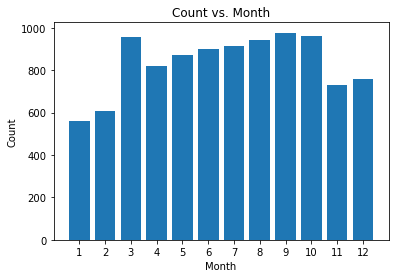

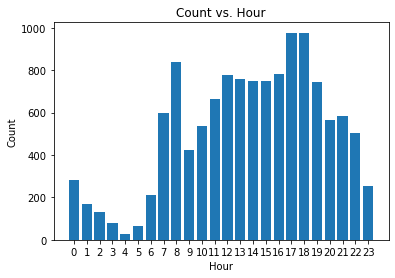

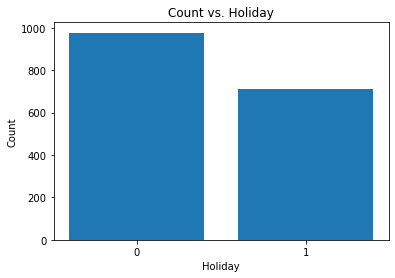

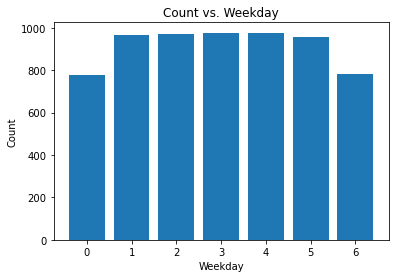

In [56]:
plt.bar(Bike_df['mnth'],Bike_df['cnt'])
plt.title("Count vs. Month")
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

plt.bar(Bike_df['hr'],Bike_df['cnt'])
plt.title("Count vs. Hour")
plt.xticks(range(0,24))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

plt.bar(Bike_df['holiday'],Bike_df['cnt'])
plt.title("Count vs. Holiday")
plt.xticks(range(0,2))
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

plt.bar(Bike_df['weekday'],Bike_df['cnt'])
plt.title("Count vs. Weekday")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

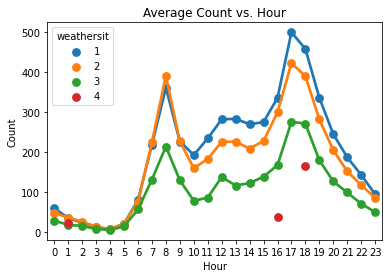

In [57]:
hourAggregated=pd.DataFrame(Bike_df.groupby(["hr","weathersit"],sort=True)["cnt"].mean()).reset_index()  
sn.pointplot(x=hourAggregated["hr"],y=hourAggregated["cnt"],hue=hourAggregated["weathersit"],data=hourAggregated,join=True)
plt.title("Average Count vs. Hour")
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

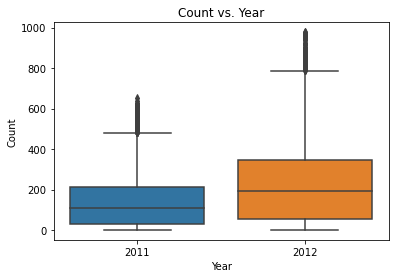

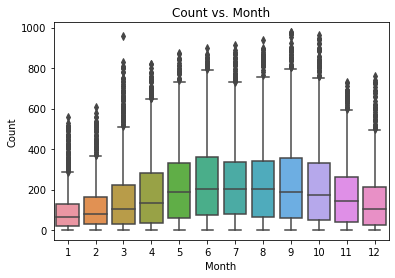

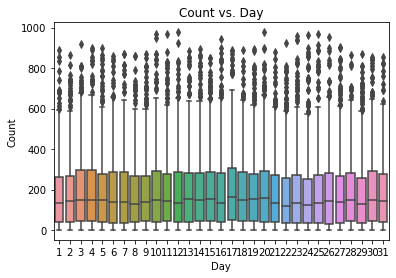

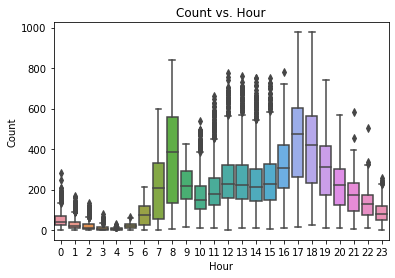

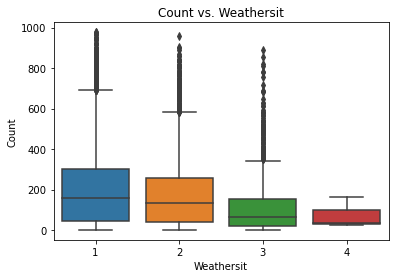

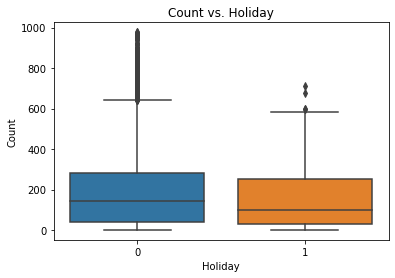

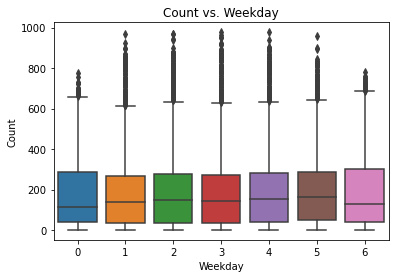

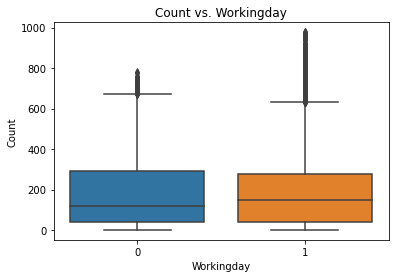

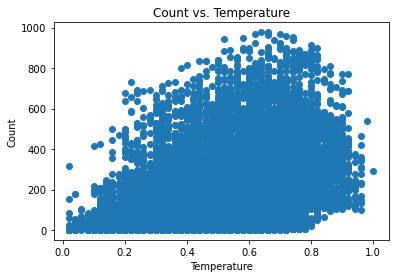

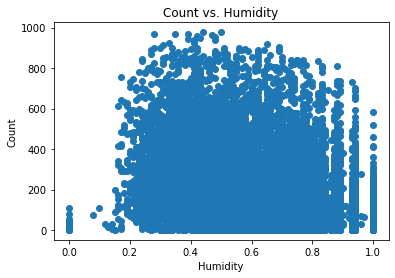

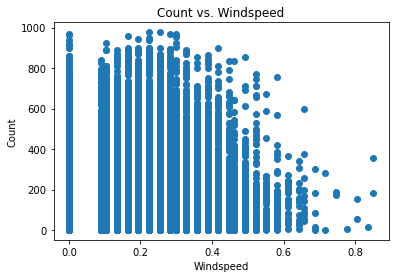

In [58]:
#Visualization of training data
sn.boxplot(Bike_df['Year'],Bike_df['cnt'])
plt.title("Count vs. Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['mnth'],Bike_df['cnt'])
plt.title("Count vs. Month")
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['Day'],Bike_df['cnt'])
plt.title("Count vs. Day")
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['hr'],Bike_df['cnt'])
plt.title("Count vs. Hour")
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['weathersit'],Bike_df['cnt'])
plt.title("Count vs. Weathersit")
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['holiday'],Bike_df['cnt'])
plt.title("Count vs. Holiday")
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['weekday'],Bike_df['cnt'])
plt.title("Count vs. Weekday")
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

sn.boxplot(Bike_df['workingday'],Bike_df['cnt'])
plt.title("Count vs. Workingday")
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.show()

plt.scatter(Bike_df['temp'],Bike_df['cnt'])
plt.title("Count vs. Temperature")
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

plt.scatter(Bike_df['hum'],Bike_df['cnt'])
plt.title("Count vs. Humidity")
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

plt.scatter(Bike_df['windspeed'],Bike_df['cnt'])
plt.title("Count vs. Windspeed")
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

In [59]:
# Since there are cno obvious changes between different'Day', we choose to drop 'day'
Bike_df=Bike_df.drop(["Day"],axis=1)

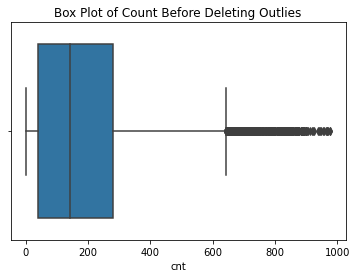

In [60]:
# detect outliers of training data
sn.boxplot(Bike_df['cnt'])
plt.title("Box Plot of Count Before Deleting Outlies")
plt.show()

Shape Of Before Ouliers:  (17379, 11)
Shape Of After Ouliers:  (17135, 11)


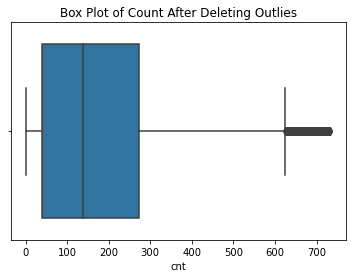

In [61]:
# delete outliers of training data
Bike_df_delete_outliers = Bike_df[np.abs(Bike_df['cnt']-Bike_df['cnt'].mean())<=(3*Bike_df['cnt'].std())] 
print("Shape Of Before Ouliers: ",Bike_df.shape)
print("Shape Of After Ouliers: ",Bike_df_delete_outliers.shape)
sn.boxplot(Bike_df_delete_outliers['cnt'])
plt.title("Box Plot of Count After Deleting Outlies")
plt.show()

In [62]:
order = ['Year', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']
Bike_df = Bike_df_delete_outliers[order]
Bike_df.describe()

Year          mnth            hr       holiday       weekday  \
count  17135.000000  17135.000000  17135.000000  17135.000000  17135.000000   
mean    2011.495477      6.522264     11.485848      0.029180      3.003793   
std        0.499994      3.451943      6.931725      0.168316      2.013274   
min     2011.000000      1.000000      0.000000      0.000000      0.000000   
25%     2011.000000      4.000000      6.000000      0.000000      1.000000   
50%     2011.000000      7.000000     11.000000      0.000000      3.000000   
75%     2012.000000     10.000000     17.000000      0.000000      5.000000   
max     2012.000000     12.000000     23.000000      1.000000      6.000000   

         workingday    weathersit          temp           hum     windspeed  \
count  17135.000000  17135.000000  17135.000000  17135.000000  17135.000000   
mean       0.678669      1.428246      0.494417      0.628875      0.189893   
std        0.467001      0.640886      0.192284      0.192907      0.122455   
min        0.000000      1.000000      0.020000      0.000000      0.000000   
25%        0.000000      1.000000      0.340000      0.480000      0.104500   
50%        1.000000      1.000000      0.500000      0.630000      0.194000   
75%        1.000000      2.000000      0.640000      0.790000      0.253700   
max        1.000000      4.000000      1.000000      1.000000      0.850700   

                cnt  
count  17135.000000  
mean     180.490516  
std      166.101082  
min        1.000000  
25%       39.000000  
50%      139.000000  
75%      273.000000  
max      733.000000

In [63]:
# Transform discrete variables into dummy variables
column_to_dummy = ['Year','mnth','hr','holiday', 'weekday', 'workingday', 'weathersit']
data_dummy = pd.get_dummies(Bike_df, columns=column_to_dummy)

In [64]:
#split the dataset into 70% of training data and 30% of testing data
np.set_printoptions(suppress=True) # cancel scientific notation
train, test = train_test_split(data_dummy, test_size=0.3, random_state=42)

In [65]:
# Standardlize the data
standard_scaler = StandardScaler()

y_train_df = train[['cnt']]
y_train = np.array(y_train_df)

X_train_df = train.drop(columns =["cnt"])
X_train = standard_scaler.fit_transform(X_train_df)

y_test_df = test[['cnt']]
y_test = np.array(y_test_df)

X_test_df = test.drop(columns =["cnt"])
X_test = standard_scaler.fit_transform(X_test_df)

# Model selection

In [66]:
## Linear Regression without PCA

In [67]:
LinearRegressionWithoutPCA = LinearRegression().fit(X_train, y_train)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, LinearRegressionWithoutPCA.predict(X_test)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, LinearRegressionWithoutPCA.predict(X_test)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, LinearRegressionWithoutPCA.predict(X_test))),2))
print("R2 score of Linear Regression without PCA", round(metrics.r2_score(y_test, LinearRegressionWithoutPCA.predict(X_test)), 2))

Mean Absolute Error: 46303071593274.66
Mean Squared Error: 3.4510576593046765e+27
Root Mean Squared Error: 58745703326325.72
R2 score of Linear Regression without PCA -1.2334457169198332e+23


In [68]:
## Ridge Regression Without PCA (L2 norm)

In [69]:
RidgeWithoutPCA = Ridge().fit(X_train, y_train)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, RidgeWithoutPCA.predict(X_test)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, RidgeWithoutPCA.predict(X_test)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, RidgeWithoutPCA.predict(X_test))),2))
print("R2 score of Linear Regression without PCA", round(metrics.r2_score(y_test, RidgeWithoutPCA.predict(X_test)), 2))

Mean Absolute Error: 70.8
Mean Squared Error: 9139.75
Root Mean Squared Error: 95.6
R2 score of Linear Regression without PCA 0.67


In [70]:
## Lasso Regression Without PCA (L1 norm)

In [71]:
lassoWithoutPCA = Lasso().fit(X_train, y_train)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, lassoWithoutPCA.predict(X_test)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, lassoWithoutPCA.predict(X_test)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, lassoWithoutPCA.predict(X_test))),2))
print("R2 score of Linear Regression without PCA", round(metrics.r2_score(y_test, lassoWithoutPCA.predict(X_test)), 2))

Mean Absolute Error: 70.66
Mean Squared Error: 9192.45
Root Mean Squared Error: 95.88
R2 score of Linear Regression without PCA 0.67


In [72]:
## PCA

In [73]:
pca = PCA(.95)
# Make copy for X_train and X_test
X_train_copy = X_train
X_test_copy = X_test
X_PCA=pca.fit(X_train_copy)
X_train_PCA = pca.transform(X_train_copy)
X_test_PCA = pca.transform(X_test_copy)

In [74]:
## Linear Regression with PCA 

In [75]:
LinearRegressionWithPCA = LinearRegression().fit(X_train_PCA, y_train)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, LinearRegressionWithPCA.predict(X_test_PCA)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, LinearRegressionWithPCA.predict(X_test_PCA)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, LinearRegressionWithPCA.predict(X_test_PCA))),2))
print("R2 score of Linear Regression without PCA", round(metrics.r2_score(y_test, LinearRegressionWithPCA.predict(X_test_PCA)), 2))

Mean Absolute Error: 75.73
Mean Squared Error: 10345.98
Root Mean Squared Error: 101.72
R2 score of Linear Regression without PCA 0.63


In [76]:
### Ridge Regression With PCA (L2 norm)

In [77]:
RidgeWithPCA = Ridge().fit(X_train_PCA, y_train)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, RidgeWithPCA.predict(X_test_PCA)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, RidgeWithPCA.predict(X_test_PCA)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, RidgeWithPCA.predict(X_test_PCA))),2))
print("R2 score of Linear Regression without PCA", round(metrics.r2_score(y_test, RidgeWithPCA.predict(X_test_PCA)), 2))

Mean Absolute Error: 75.73
Mean Squared Error: 10346.01
Root Mean Squared Error: 101.72
R2 score of Linear Regression without PCA 0.63


In [78]:
## Lasso Regression With PCA (L1 norm)

In [79]:
lassoWithPCA = Lasso().fit(X_train_PCA, y_train)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, lassoWithPCA.predict(X_test_PCA)),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, lassoWithPCA.predict(X_test_PCA)),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, lassoWithPCA.predict(X_test_PCA))),2))
print("R2 score of Linear Regression without PCA", round(metrics.r2_score(y_test, lassoWithPCA.predict(X_test_PCA)), 2))

Mean Absolute Error: 76.05
Mean Squared Error: 10387.32
Root Mean Squared Error: 101.92
R2 score of Linear Regression without PCA 0.63


In [80]:
#For compare all the result, we find Ridge Regression Without PCA (L2 norm) has minimum error
print(RidgeWithoutPCA.coef_)
print(RidgeWithoutPCA.intercept_)

[[ 45.26978881 -13.93943585  -4.75359013 -18.56629225  18.56629225
   -8.92504012  -8.45354151  -2.23092411   2.15829859   5.11694817
   -0.55234409  -7.46347883  -2.282943     5.31080202   9.91086149
    6.39378853   0.71780037 -23.71366521 -27.20251453 -28.96556382
  -30.78939068 -31.52772763 -28.4511967  -16.85765025  11.50988368
   33.02031435   9.23259285  -1.20447806   3.45386686  11.59330084
   10.28378305   6.93177207   9.31099978  21.03773608  39.34435525
   34.10028519  23.94795399   8.2627908   -2.02074191  -9.45140281
  -17.50101323   2.40780666  -2.40780666  -2.17027651  -1.72476344
   -0.89514014  -0.60595137  -0.05955354   1.92982381   3.50446737
    0.14140146  -0.14140146   6.18451862   1.88864242 -13.67336007
   -0.72893012]]
[180.76279807]


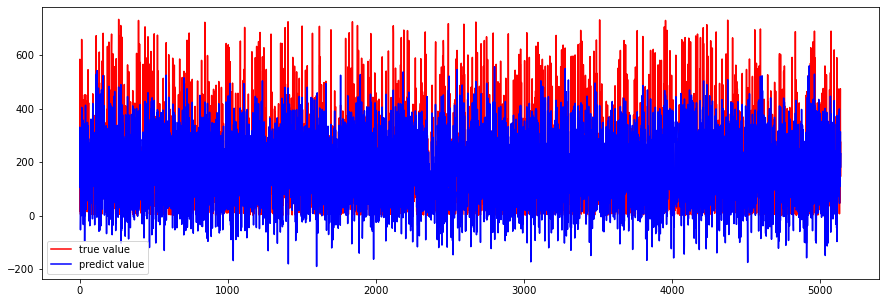

In [81]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'r', label='true value')
plt.plot(range(len(y_test)),RidgeWithoutPCA.predict(X_test), 'b', label='predict value')
plt.legend()

Text(0.5, 0, 'true value')

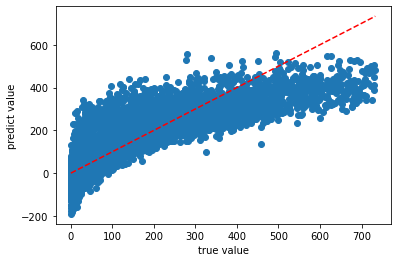

In [82]:
plt.scatter(y_test, RidgeWithoutPCA.predict(X_test))
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--')
plt.ylabel('predict value')
plt.xlabel('true value')

## Regression tree

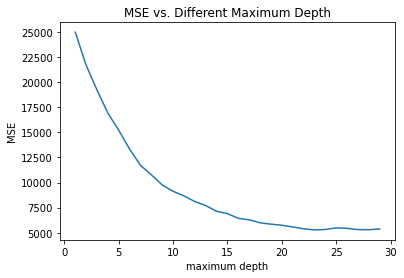

In [83]:
max_depths = []
mse_depths = []

for i in range(1,30):
    regre_tree = DecisionTreeRegressor(criterion='mse',max_depth=i)
    regre_tree.fit(X_train,y_train)
    y_pred = regre_tree.predict(X_test)
    mse_depth = mean_squared_error(y_test, y_pred)
    max_depths.append(i)
    mse_depths.append(mse_depth)
    
plt.plot(max_depths, mse_depths)
plt.title('MSE vs. Different Maximum Depth')
plt.xlabel('maximum depth')
plt.ylabel('MSE')
plt.show()

In [84]:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

In [85]:
optimal_regre_tree = DecisionTreeRegressor(criterion='mse',max_depth=10)
optimal_regre_tree.fit(X_train,y_train)
y_pred_regre_tree = optimal_regre_tree.predict(X_test)
print('Score of regression tree: ' + str(optimal_regre_tree.score(X_test, y_test)))

Score of regression tree: 0.671925189104541


In [128]:
print("R2_score of regression tree: " + str(metrics.r2_score(y_test, y_pred_regre_tree)))
print('MSE of regression tree: ' + str(mean_squared_error(y_test, y_pred_regre_tree)))
print('RMSE of regression tree: ' + str(np.sqrt(mean_squared_error(y_test, y_pred_regre_tree))))

R2_score of regression tree: 0.6719251888802966
MSE of regression tree: 9179.204835970044
RMSE of regression tree: 95.8081668542408


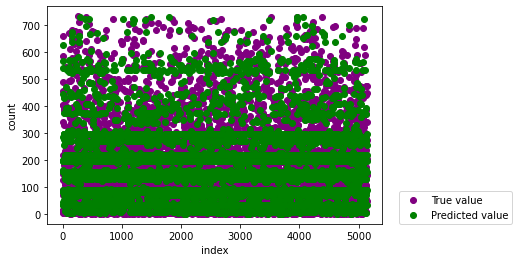

In [87]:
plt.scatter(range(len(test)), y_test, c='purple', label = 'True value')
plt.scatter(range(len(test)), y_pred_regre_tree, c='green', label = 'Predicted value')
plt.xlabel('index')
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.375609 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.375609 to fit



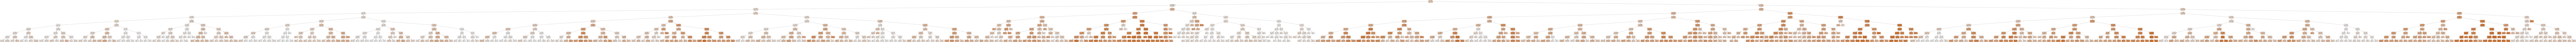

In [88]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/hunter/Desktop/release/bin/'
import pydotplus
dot_data = tree.export_graphviz(optimal_regre_tree, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
graph.write_png("graph.png")
from IPython.display import Image
Image(graph.create_png())

# Random Forest

In [95]:
# adjust hyperparameters
rf_param_grid = {"n_estimators":[50,100,150,200,500],"max_depth":[5,10,15,20,25,30]}
grid = GridSearchCV(ensemble.RandomForestRegressor(),param_grid=rf_param_grid,cv = 5)
grid.fit(X_train, y_train.ravel())
print('best_params_',rf.best_params_)

best_params_ {'max_depth': 20, 'n_estimators': 200}


In [96]:
rf = ensemble.RandomForestRegressor(n_estimators=200,max_depth=20)
rf.fit(X_train, y_train.ravel())
y_pred_rf = rf.predict(X_test) 
print('Score of Random Forest Regressor: ' + str(rf.score(X_test, y_test)))

Score of Random Forest Regressor: 0.8923183301370443


In [130]:
print("R2_score of Random Forest Regressor: " + str(metrics.r2_score(y_test, y_pred_rf)))
print('MSE of Random Forest Regressor: ' + str(mean_squared_error(y_test, y_pred_rf)))
print('RMSE of Random Forest Regressor: ' + str(np.sqrt(mean_squared_error(y_test, y_pred_rf))))

R2_score of Random Forest Regressor: 0.8923183300634422
MSE of Random Forest Regressor: 3012.8253432609195
RMSE of Random Forest Regressor: 54.88920971612654


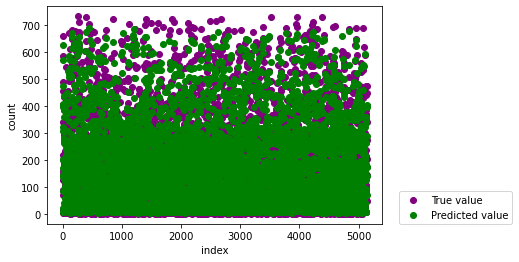

In [98]:
plt.scatter(range(len(test)), y_test, c = 'purple', label = 'True value')
plt.scatter(range(len(test)), y_pred_rf, c = 'green', label = 'Predicted value')
plt.xlabel('index')
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()

In [99]:
def rf_feat_importance(model, df):

    return pd.DataFrame({'cols':df.columns, 'imp':model.feature_importances_} ).sort_values('imp', ascending=False)


fi = rf_feat_importance(rf, X_train_df); fi[:5]

cols       imp
0    temp  0.167348
1     hum  0.152843
25   hr_8  0.062749
34  hr_17  0.055790
35  hr_18  0.050134

# Neural Network

In [137]:
import torch as to
import torchvision as tv
from torchvision import datasets, transforms
import torch as to

In [138]:
x_train = to.Tensor(X_train)
y_train = to.Tensor(y_train)
x_test = to.Tensor(X_test)
y_test = to.Tensor(y_test)

In [139]:
y_train = y_train.reshape(11994, 1)
print(x_train.shape)
print(y_train.shape)

torch.Size([11994, 56])
torch.Size([11994, 1])


In [140]:
##Define Network

In [141]:
class nn(to.nn.Module):
    def __init__(self, num_features, num_hl, num_output):
        super(nn, self).__init__()
        self.fc1 = to.nn.Linear(num_features, num_hl)
        self.fc2 = to.nn.Linear(num_hl, num_hl)
        self.fc3 = to.nn.Linear(num_hl, num_output)
    def forward(self, x):
        x = to.nn.functional.relu(self.fc1(x))
        x = to.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [142]:
net = nn(num_features =56, num_hl = 60, num_output = 1)
net

nn(
  (fc1): Linear(in_features=56, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=1, bias=True)
)

In [143]:
##Optimize model and get the SME value

In [144]:
opti = to.optim.SGD(net.parameters(), lr =0.0001) ##Set optimization
cf = to.nn.MSELoss() ##define the loss function as SME

In [145]:
for t in range(9000):
    prediction = net(x_train)     # input the data 

    loss = cf(prediction, y_train)     # create loss function 
    opti.zero_grad()   #optimize process
    loss.backward()         
    opti.step() 

In [146]:
##Output 

In [147]:
output = net(x_train)
output

tensor([[292.5511],
        [132.6409],
        [ 68.1066],
        ...,
        [195.5917],
        [108.5269],
        [ 94.3596]], grad_fn=<AddmmBackward>)

In [148]:
output1 = net(x_test)
output1

tensor([[  5.7366],
        [525.1000],
        [448.6820],
        ...,
        [452.1428],
        [136.3732],
        [200.8979]], grad_fn=<AddmmBackward>)

In [149]:
##The SME and RSME value for Training and Test set.

In [150]:
SME = cf(output, y_train)
RSME = to.sqrt(SME)
print("Training set SME is", SME)
print("Training set RSME is", RSME)

Training set SME is tensor(1106.7200, grad_fn=<MseLossBackward>)
Training set RSME is tensor(33.2674, grad_fn=<SqrtBackward>)


In [151]:
y_test = y_test.reshape(5141,1)
test_sme = cf(output1, y_test)
test_rsme = to.sqrt(test_sme)
print("Test set SME is", test_sme)
print("Test set RSME is", test_rsme)

Test set SME is tensor(2195.1797, grad_fn=<MseLossBackward>)
Test set RSME is tensor(46.8527, grad_fn=<SqrtBackward>)


In [152]:
##Converse tensors to numpy array to plot and create tables.

In [153]:
output = output.detach().numpy()
print(output)
type(output)

[[292.5511  ]
 [132.64095 ]
 [ 68.10663 ]
 ...
 [195.59166 ]
 [108.5269  ]
 [ 94.359634]]


numpy.ndarray

In [154]:
output1 = output1.detach().numpy()
type(output1)

numpy.ndarray

In [155]:
print("R2_score is: " + str(metrics.r2_score(y_test, output1)))

R2_score is: 0.9215418837972765


In [156]:
##plot a scatter plot: x is the temperature, y is the counts.
##The blue point is the actual counts, and the orange points is the predicted points.

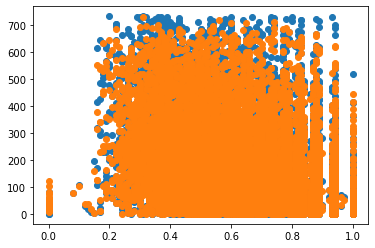

In [157]:
temp = train.iloc[:, 1]
plt.scatter(temp, y_train)
plt.scatter(temp, output)
plt.show()

In [158]:
temp1 = test.iloc[:, 1]

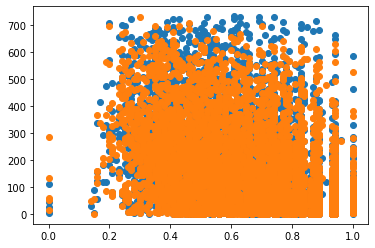

In [159]:
plt.scatter(temp1, y_test)
plt.scatter(temp1, output1)
plt.show()

In [160]:
y_test = y_test.detach().numpy()
y_train = y_train.detach().numpy()
y_train = y_train.reshape(11994)
output = output.reshape(11994)
output1 = output1.reshape(5141)
y_test = y_test.reshape(5141)

In [161]:
##create tables of actual values and predicted values to compare.

In [162]:
df1 = pd.DataFrame({'Actual count': y_train,'Predicted count': output})
df1

Actual count  Predicted count
0             292.0       292.551086
1             169.0       132.640945
2              90.0        68.106628
3             289.0       277.867004
4              76.0        70.181541
...             ...              ...
11989         331.0       314.269226
11990          16.0         5.978117
11991         189.0       195.591660
11992         100.0       108.526901
11993         115.0        94.359634

[11994 rows x 2 columns]

In [163]:
df2 = pd.DataFrame({'Actual count': y_test,'Predicted count': output1})
df2

Actual count  Predicted count
0             17.0         5.736574
1            584.0       525.099976
2            404.0       448.682037
3            457.0       425.188141
4            127.0       108.121422
...            ...              ...
5136         447.0       496.490112
5137         343.0       267.432495
5138         474.0       452.142822
5139         146.0       136.373184
5140         274.0       200.897949

[5141 rows x 2 columns]

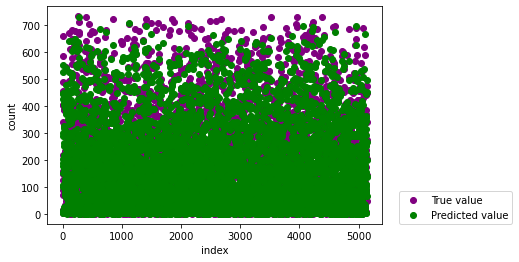

In [164]:
plt.scatter(range(len(test)), y_test, c = 'purple', label = 'True value')
plt.scatter(range(len(test)), output1, c = 'green', label = 'Predicted value')
plt.xlabel('index')
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()